# Load data

In [2]:
import torch
from dataset.ClimateDataset import ClimateDataset

from torch.utils.data import DataLoader
from tqdm import tqdm



In [18]:
import xarray as xr
import numpy as np

# Load the NetCDF file
lsm_path = '/glade/derecho/scratch/mdarman/lucie/src/era5_land_sea_mask.nc'
data = xr.open_dataset(lsm_path)

# Access the land-sea mask variable and squeeze to remove the 'valid_time' dimension
land_sea_mask = data['lsm'].squeeze(dim='valid_time')

# Convert to a binary matrix with float32 data type (1.0 for land, 0.0 for sea)
binary_lsm = (land_sea_mask.values > 0.5).astype(np.float32)  # Ensure float32 data type

# Save to a .npz file
np.savez('land_sea_mask_binary_float32.npz', land_sea_mask=binary_lsm)

# Load the binary matrix from the .npz file to verify
loaded_data = np.load('land_sea_mask_binary_float32.npz')
binary_lsm_loaded = loaded_data['land_sea_mask']

# Print the shape and data type to verify
print("Loaded binary matrix shape:", binary_lsm_loaded.shape)
print("Loaded binary matrix data type:", binary_lsm_loaded.dtype)
print(binary_lsm_loaded)

Loaded binary matrix shape: (721, 1440)
Loaded binary matrix data type: float32
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


torch.Size([1, 1, 721, 1440])


In [49]:
import torch

# Set seed for reproducibility
torch.manual_seed(0)

# Example input data
data = torch.rand(2, 6, 721, 1440)

# Assume loaded_data is of shape (1, 721, 1440)
# loaded_data = torch.rand(1, 721, 1440)
lsm = torch.tensor(np.load('/glade/derecho/scratch/mdarman/lucie/lsm.npz')['land_sea_mask']).unsqueeze(0).unsqueeze(1)

# Expand loaded_data to match the batch size of data
lsm_expanded = lsm.expand(data.shape[0], -1, -1, -1)  # Shape: (2, 721, 1440)

# Add a channel dimension to loaded_data_expanded
# loaded_data_expanded = loaded_data_expanded.unsqueeze(1)  # Shape: (2, 1, 721, 1440)

# Concatenate along the channel dimension
catt = torch.cat([data, lsm_expanded], dim=1)  # Shape: (2, 7, 721, 1440)

print("Loaded data batch shape:", lsm_expanded.shape)
print("Data shape:", data.shape)
print("Concatenated shape:", catt.shape)

Loaded data batch shape: torch.Size([2, 1, 721, 1440])
Data shape: torch.Size([2, 6, 721, 1440])
Concatenated shape: torch.Size([2, 7, 721, 1440])


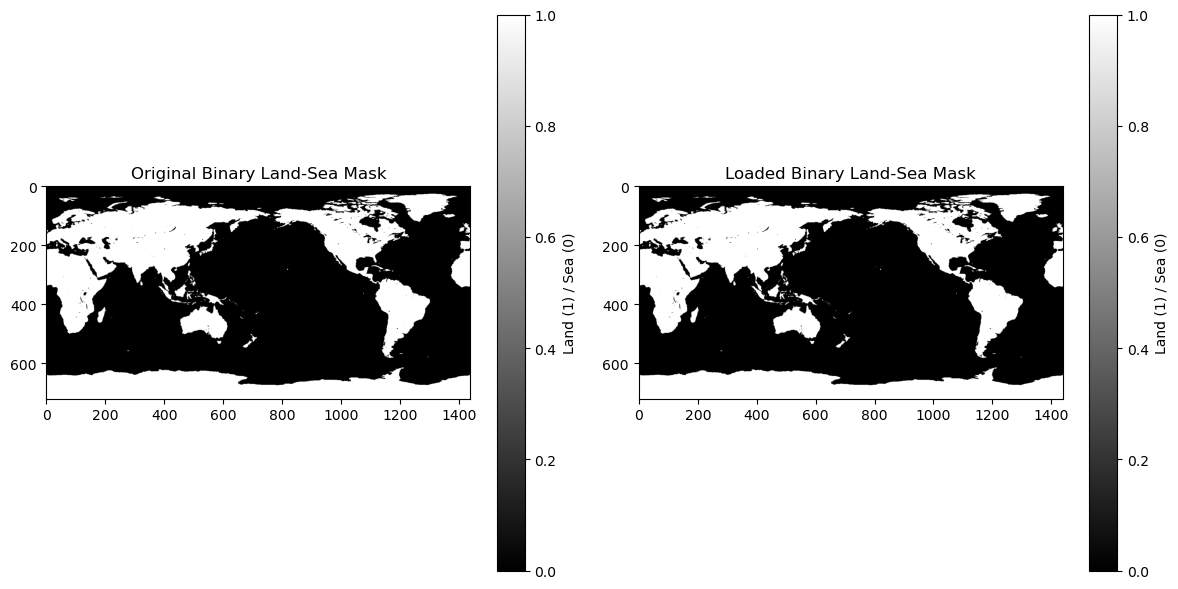

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load the original NetCDF file
lsm_path = '/glade/derecho/scratch/mdarman/lucie/src/era5_land_sea_mask.nc'
data = xr.open_dataset(lsm_path)
land_sea_mask_original = data['lsm'].squeeze(dim='valid_time')

# Convert the original to a binary matrix in float32
binary_lsm_original = (land_sea_mask_original.values > 0.5).astype(np.float32)

# Load the saved binary matrix from .npz file
loaded_data = np.load('land_sea_mask_binary_float32.npz')
binary_lsm_loaded = loaded_data['land_sea_mask']

# Plotting the original and loaded binary LSM side-by-side
plt.figure(figsize=(12, 6))

# Plot the original binary LSM
plt.subplot(1, 2, 1)
plt.imshow(binary_lsm_original, cmap='gray')
plt.title("Original Binary Land-Sea Mask")
plt.colorbar(label='Land (1) / Sea (0)')

# Plot the loaded binary LSM
plt.subplot(1, 2, 2)
plt.imshow(binary_lsm_loaded, cmap='gray')
plt.title("Loaded Binary Land-Sea Mask")
plt.colorbar(label='Land (1) / Sea (0)')

# Show the plots
plt.tight_layout()
plt.show()

In [11]:
# Import .nc file

# Load data
# Load data
import xarray as xr

# Load the NetCDF file
lsm_path = '/glade/derecho/scratch/mdarman/lucie/src/era5_land_sea_mask.nc'
data = xr.open_dataset(lsm_path)
print(data.keys())
land_sea_mask = data['lsm']

print(land_sea_mask)

KeysView(<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2000-01-01
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 16B ...
Data variables:
    lsm         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-12T21:04 GRIB to CDM+CF via cfgrib-0.9.1...)
<xarray.DataArray 'lsm' (valid_time: 1, latitude: 721, longitude: 1440)> Size: 4MB
[1038240 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time 

In [18]:
# Example usage
steps = range(100)  # Some example steps
data_dir = "/home/exouser/qgm1/fujitsu_data"

dataset = GlorysRomsDataset(steps=steps, channels=["SSU", "SSV", "SSH"], added_channels=[], data_dir=data_dir, lat_lon_keep=(17.1, 30.9, -98.0, -74.1), interpolator_use="scipy", )
# dataset2= GlorysRomsDatasetNew(steps=steps, channels=["SSU", "SSV", "SSH"], added_channels=[], data_dir=data_dir, lat_lon_keep=(17.1, 30.9, -98.0, -74.1), interpolator_use="scipy", )
data_loader = DataLoader(dataset, batch_size=100, shuffle=False)
# data_loader2 = DataLoader(dataset2, batch_size=100, shuffle=False)


In [19]:
for data in tqdm(data_loader):
    cond_input = None
    cond_input, im = data
    print(cond_input.shape)
    print(im.shape)
    break

  0%|          | 0/1 [00:15<?, ?it/s]

torch.Size([100, 3, 342, 597])
torch.Size([100, 3, 342, 597])


In [13]:
for data2 in tqdm(data_loader2):
    cond_input2 = None
    cond_input2, im2 = data2
    print(cond_input2.shape)
    print(im2.shape)
    break

  0%|          | 0/1 [00:13<?, ?it/s]

torch.Size([100, 3, 342, 597])
torch.Size([100, 3, 342, 597])


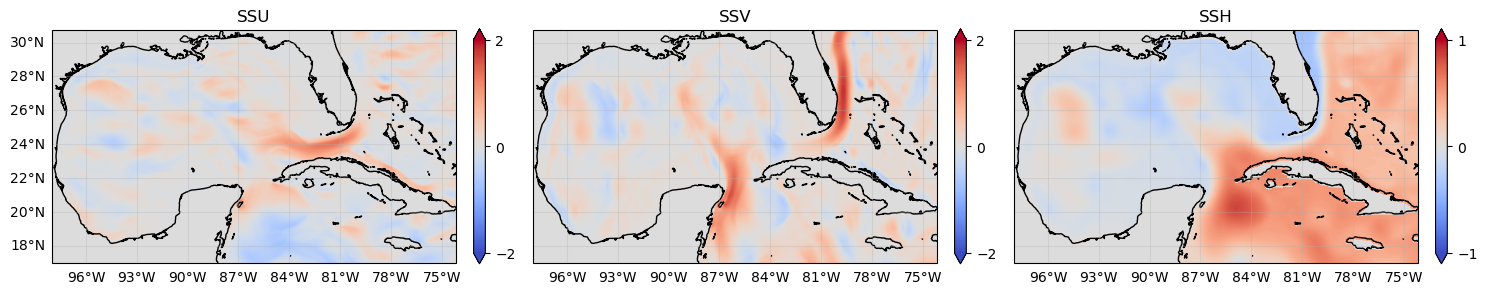

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims=[[-2,2],[-2,2],[-1,1]]
hrlr = 'hr'
time_step = 10
dataset = dataset
# If LR data
if hrlr == 'lr':
    loncoords = dataset.lrcoordmeshX[0,:]
    latcoords = dataset.lrcoordmeshY[:,0]
    preds = cond_input[time_step]
# If HR data
elif hrlr == 'hr':
    loncoords = dataset.hrcoordmeshX[0,:]
    latcoords = dataset.hrcoordmeshY[:,0]
    preds = im[time_step]

# Assuming preds is your prediction data (shape: [C, W, H])
# Example preds, loncoords, latcoords, and channel_lims data should be defined in your context
projection = ccrs.PlateCarree()

# Create a 1x3 subplot layout for each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
    # Plot each channel separately in the 1x3 grid
    im1 = axs[ivar].contourf(loncoords[:-4], latcoords[:-6], preds[ivar, :, :], 
                             levels=np.linspace(lims[0], lims[1], 200), 
                             vmin=lims[0], vmax=lims[1], transform=projection, 
                             cmap="coolwarm", extend='both')
    
    axs[ivar].coastlines()

    # Add colorbars for each subplot
    cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                        ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5)

    # Add gridlines
    gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    if ivar != 0:
        gl.left_labels = False

    axs[ivar].set_title(f"{var}")

plt.tight_layout()
plt.show()

In [16]:
loncoords[:-4].shape

(597,)

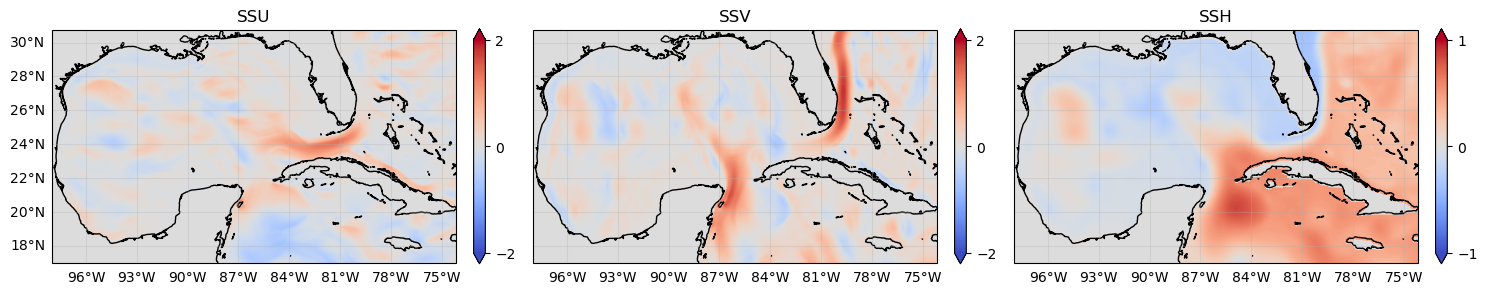

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims=[[-2,2],[-2,2],[-1,1]]
hrlr = 'hr'
time_step = 10
# If LR data
if hrlr == 'lr':
    loncoords = dataset.lrcoordmeshX[0,:]
    latcoords = dataset.lrcoordmeshY[:,0]
    preds = cond_input[time_step]
# If HR data
elif hrlr == 'hr':
    loncoords = dataset.hrcoordmeshX[0,:]
    latcoords = dataset.hrcoordmeshY[:,0]
    preds = im[time_step]

# Assuming preds is your prediction data (shape: [C, W, H])
# Example preds, loncoords, latcoords, and channel_lims data should be defined in your context
projection = ccrs.PlateCarree()

# Create a 1x3 subplot layout for each channel
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
    # Plot each channel separately in the 1x3 grid
    im1 = axs[ivar].contourf(loncoords[:-4], latcoords[:-6], preds[ivar, :, :], 
                             levels=np.linspace(lims[0], lims[1], 200), 
                             vmin=lims[0], vmax=lims[1], transform=projection, 
                             cmap="coolwarm", extend='both')
    
    axs[ivar].coastlines()

    # Add colorbars for each subplot
    cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                        ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5)

    # Add gridlines
    gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False

    if ivar != 0:
        gl.left_labels = False

    axs[ivar].set_title(f"{var}")

plt.tight_layout()
plt.show()

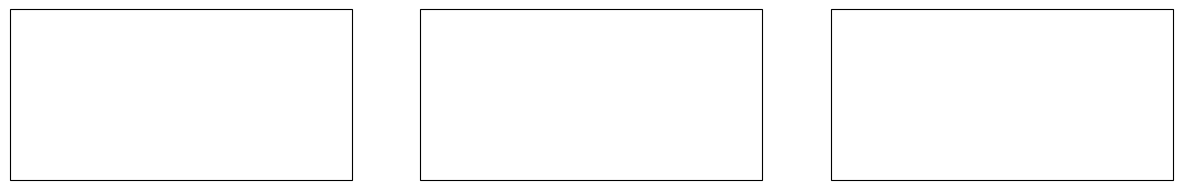

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.animation as animation

# Assuming channels are ["SSU", "SSV", "SSH"]
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]
hrlr = 'hr'

# Function to update the plot for each time step
def update_plot(time_step):
    # Clear the current plot for updating
    for ax in axs:
        ax.clear()

    # If LR data
    if hrlr == 'lr':
        loncoords = dataset.lrcoordmeshX[0, :]
        latcoords = dataset.lrcoordmeshY[:, 0]
        preds = cond_input[time_step]
    # If HR data
    elif hrlr == 'hr':
        loncoords = dataset.hrcoordmeshX[0, :]
        latcoords = dataset.hrcoordmeshY[:, 0]
        preds = im[time_step]

    # Update the plots for each channel
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims), 0):
        im1 = axs[ivar].contourf(loncoords, latcoords, preds[ivar, :, :], 
                                 levels=np.linspace(lims[0], lims[1], 200), 
                                 vmin=lims[0], vmax=lims[1], transform=projection, 
                                 cmap="coolwarm", extend='both')
        
        axs[ivar].coastlines()

        # Add colorbars for each subplot
        cbar = fig.colorbar(im1, ax=axs[ivar], orientation='vertical', 
                            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04)

        # Add gridlines
        gl = axs[ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[ivar].set_title(f"{var}")

    plt.tight_layout()

# Create a figure and 1x3 subplot layout for each channel
projection = ccrs.PlateCarree()
fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': projection})

# Create animation
time_steps = range(0, 50)  # Adjust the range based on the number of time steps you have
ani = animation.FuncAnimation(fig, update_plot, frames=time_steps, repeat=False)

# Show the animation in an interactive window
plt.show()

Load VAE samples

In [24]:
import numpy as np
import os

path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 1

# Corrected 'with' statement to include 'as' and a variable to hold the data
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Shape depends on your data
    print(hres_loaded.shape)
    print(decoded_output_loaded.shape)



(8, 3, 342, 597)
(8, 3, 342, 597)


hres_loaded shape: (8, 3, 342, 597)
decoded_output_loaded shape: (8, 3, 342, 597)


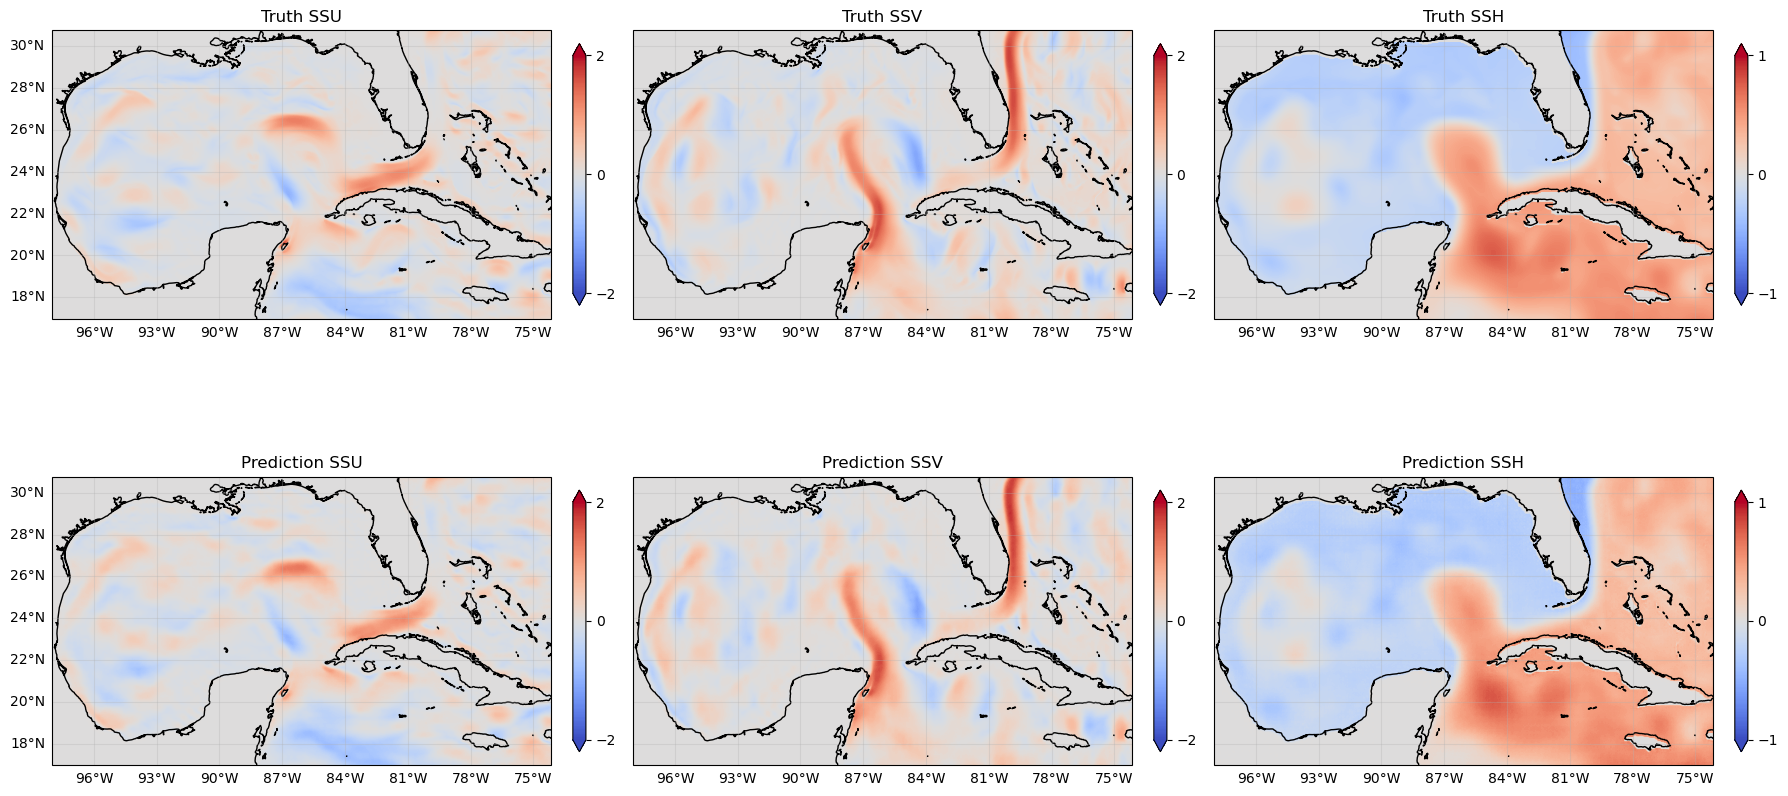

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data
path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 50

with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Adjust shape based on your data
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Select the sample index to visualize
sample_index = 2  # You can change this to visualize different samples

# Extract the sample data
hres_sample = hres_loaded[sample_index]  # Shape: [channels, height, width]

# Check if decoded_output_loaded has multiple ensembles
if len(decoded_output_loaded.shape) == 5:
    # If multiple ensembles, select one (e.g., the first one)
    num_samples = decoded_output_loaded.shape[0]
    decoded_sample = decoded_output_loaded[0, sample_index]  # Shape: [channels, height, width]
else:
    decoded_sample = decoded_output_loaded[sample_index]  # Shape: [channels, height, width]

# Define the channels and limits
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]

# Create longitude and latitude coordinates
# Replace these with your actual coordinates if available
height, width = hres_sample.shape[1], hres_sample.shape[2]
# loncoords = np.linspace(-180, 180, width)
# latcoords = np.linspace(-90, 90, height)

# Set up the plotting projection
projection = ccrs.PlateCarree()

# Create a figure with 2 rows (truth and model output) and 3 columns (channels)
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': projection})

# Function to plot data for a given sample and row index
def plot_sample(data_sample, row_index, title_prefix):
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims)):
        im = axs[row_index, ivar].contourf(
            loncoords[:-4], latcoords[:-6], data_sample[ivar, :, :],
            levels=np.linspace(lims[0], lims[1], 200),
            vmin=lims[0], vmax=lims[1], transform=projection,
            cmap="coolwarm", extend='both'
        )

        axs[row_index, ivar].coastlines()

        cbar = fig.colorbar(
            im, ax=axs[row_index, ivar], orientation='vertical',
            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5
        )

        gl = axs[row_index, ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[row_index, ivar].set_title(f"{title_prefix} {var}")

# Plot the ground truth data
plot_sample(hres_sample, row_index=0, title_prefix="Truth")

# Plot the model output data
# plot_sample(decoded_sample, row_index=1, title_prefix="Model Output")

plot_sample(decoded_sample, row_index=1, title_prefix='Prediction')

plt.tight_layout()
plt.show()

Calculate the spectrums

In [18]:
from scipy import fft  
spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis = 3)).mean(axis = 2)
spectrum_truth = np.abs(fft.rfft(hres_loaded, axis = 3)).mean(axis = 2)
ks = np.arange(1, spectrum_pred.shape[2])

In [17]:
spectrum_pred.shape

(8, 3, 305)

hres_loaded shape: (8, 3, 342, 597)
decoded_output_loaded shape: (8, 3, 342, 597)


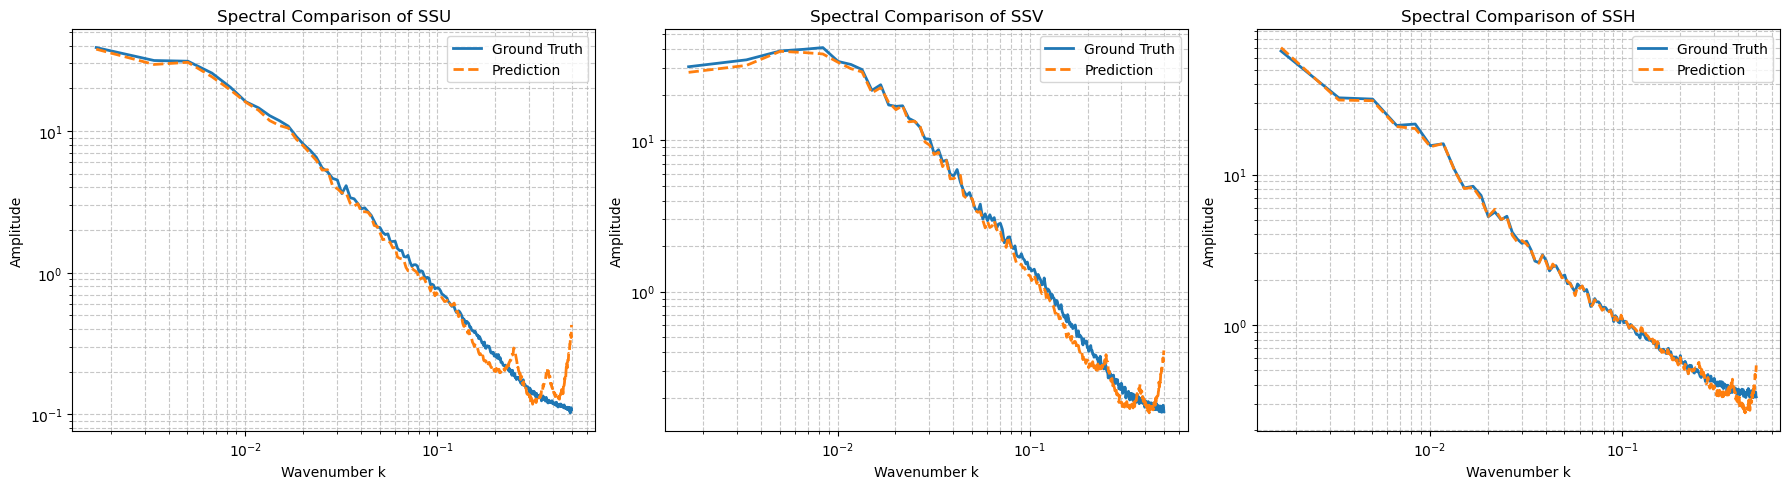

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import os

# Load your data (adjust the path and file index as needed)
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples"
idx = 1

with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['decoded_outputs']  # Shape: [batch_size, channels, height, width]
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Compute the spectra
spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

# Average over the batch dimension
spectrum_pred_mean = spectrum_pred.mean(axis=0)   # Shape: [channels, n_freqs]
spectrum_truth_mean = spectrum_truth.mean(axis=0) # Shape: [channels, n_freqs]

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Number of points along the width
n = decoded_output_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
spectrum_pred_mean = spectrum_pred_mean[:, 1:]
spectrum_truth_mean = spectrum_truth_mean[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    plt.loglog(ks, spectrum_truth_mean[i], label='Ground Truth', linewidth=2)
    plt.loglog(ks, spectrum_pred_mean[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9131.npz' with keys: hres, output)
Processed batch 9132/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9132.npz' with keys: hres, output)
Processed batch 9133/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9133.npz' with keys: hres, output)
Processed batch 9134/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9134.npz' with keys: hres, output)
Processed batch 9135/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9135.npz' with keys: hres, output)
Processed batch 9136/100
KeysView(NpzFile '/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm/ldm_9136.npz' with keys: hres, output)
Processed batch 9137/100
KeysView(NpzFile '/media/volume/mo

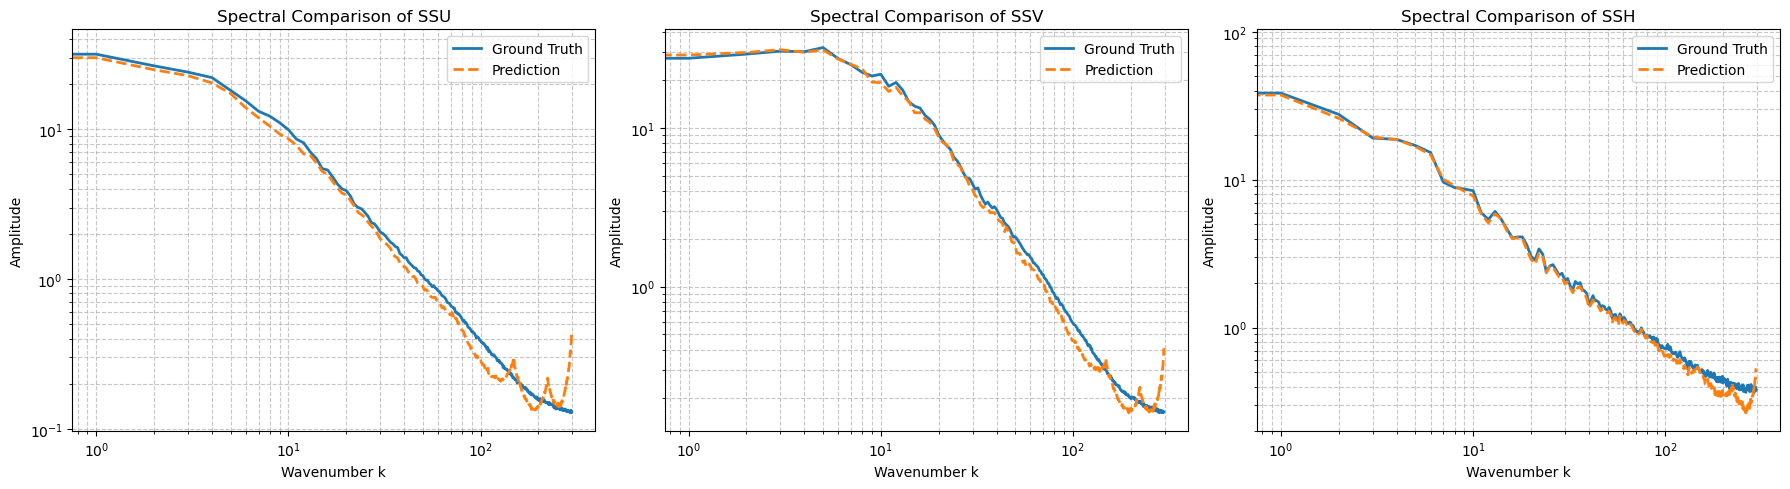

In [5]:
import numpy as np
import os
from scipy import fft
import matplotlib.pyplot as plt

# Initialize accumulators
total_spectrum_pred = None  # Will hold the sum of predicted spectra
total_spectrum_truth = None  # Will hold the sum of ground truth spectra
total_samples = 0  # Total number of samples processed

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"

# Number of batches
num_batches = 100  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(9131, 9131+num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        print(data.keys())  
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output']  # Shape: [batch_size, channels, height, width] or [num_samples, batch_size, channels, height, width]


    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Compute the spectra along the width (axis=3)
    spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
    spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

    # Accumulate the spectra and sample count
    if total_spectrum_pred is None:
        # Initialize the accumulators with the spectra from the first batch
        total_spectrum_pred = spectrum_pred.sum(axis=0)   # Sum over batch dimension
        total_spectrum_truth = spectrum_truth.sum(axis=0) # Sum over batch dimension
    else:
        # Accumulate the sums
        total_spectrum_pred += spectrum_pred.sum(axis=0)
        total_spectrum_truth += spectrum_truth.sum(axis=0)

    # Update the total number of samples processed
    total_samples += hres_loaded.shape[0]

    print(f"Processed batch {idx+1}/{num_batches}")

# Compute the mean spectra over all samples
mean_spectrum_pred = total_spectrum_pred / total_samples  # Shape: [channels, n_freqs]
mean_spectrum_truth = total_spectrum_truth / total_samples  # Shape: [channels, n_freqs]

# Number of points along the width (assuming all batches have the same width)
n = hres_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
mean_spectrum_pred = mean_spectrum_pred[:, 1:]
mean_spectrum_truth = mean_spectrum_truth[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    # plt.plot(ks, mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    # plt.plot(ks, mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.plot(mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    plt.plot(mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import os

# Number of channels
num_channels = 3  # Assuming channels are ["SSU", "SSV", "SSH"]

# Initialize accumulators for each channel
sum_x = np.zeros(num_channels)
sum_y = np.zeros(num_channels)
sum_x2 = np.zeros(num_channels)
sum_y2 = np.zeros(num_channels)
sum_xy = np.zeros(num_channels)
n = np.zeros(num_channels)  # Total number of data points per channel

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"

# Number of batches
num_batches = 100  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(9131, 9131+num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output']  # Adjust shape based on your data

    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Reshape data to [batch_size, channels, height * width]
    batch_size, num_channels, height, width = hres_loaded.shape

    hres_flat = hres_loaded.reshape(batch_size, num_channels, -1)
    decoded_flat = decoded_output_loaded.reshape(batch_size, num_channels, -1)

    # Accumulate statistics for each channel
    for ch in range(num_channels):
        x = decoded_flat[:, ch, :].ravel()  # Flatten to 1D array
        y = hres_flat[:, ch, :].ravel()     # Flatten to 1D array

        sum_x[ch] += np.sum(x)
        sum_y[ch] += np.sum(y)
        sum_x2[ch] += np.sum(x ** 2)
        sum_y2[ch] += np.sum(y ** 2)
        sum_xy[ch] += np.sum(x * y)
        n[ch] += x.size  # x.size should be equal to y.size

    print(f"Processed batch {idx+1}/{num_batches}")

# Initialize array to store correlation coefficients
corr_coefficients = np.zeros(num_channels)

for ch in range(num_channels):
    numerator = n[ch] * sum_xy[ch] - sum_x[ch] * sum_y[ch]
    denominator = np.sqrt((n[ch] * sum_x2[ch] - sum_x[ch] ** 2) * (n[ch] * sum_y2[ch] - sum_y[ch] ** 2))
    if denominator != 0:
        corr_coefficients[ch] = numerator / denominator
    else:
        corr_coefficients[ch] = np.nan  # Handle division by zero

# Print the correlation coefficients
channels = ["SSU", "SSV", "SSH"]
for ch in range(num_channels):
    print(f"Correlation coefficient for {channels[ch]}: {corr_coefficients[ch]:.4f}")

Processed batch 9132/100
Processed batch 9133/100
Processed batch 9134/100
Processed batch 9135/100
Processed batch 9136/100
Processed batch 9137/100
Processed batch 9138/100
Processed batch 9139/100
Processed batch 9140/100
Processed batch 9141/100
Processed batch 9142/100
Processed batch 9143/100
Processed batch 9144/100
Processed batch 9145/100
Processed batch 9146/100
Processed batch 9147/100
Processed batch 9148/100
Processed batch 9149/100
Processed batch 9150/100
Processed batch 9151/100
Processed batch 9152/100
Processed batch 9153/100
Processed batch 9154/100
Processed batch 9155/100
Processed batch 9156/100
Processed batch 9157/100
Processed batch 9158/100
Processed batch 9159/100
Processed batch 9160/100
Processed batch 9161/100
Processed batch 9162/100
Processed batch 9163/100
Processed batch 9164/100
Processed batch 9165/100
Processed batch 9166/100
Processed batch 9167/100
Processed batch 9168/100
Processed batch 9169/100
Processed batch 9170/100
Processed batch 9171/100


For DDPM

hres_loaded shape: (1, 3, 342, 597)
decoded_output_loaded shape: (1, 3, 342, 597)


NameError: name 'loncoords' is not defined

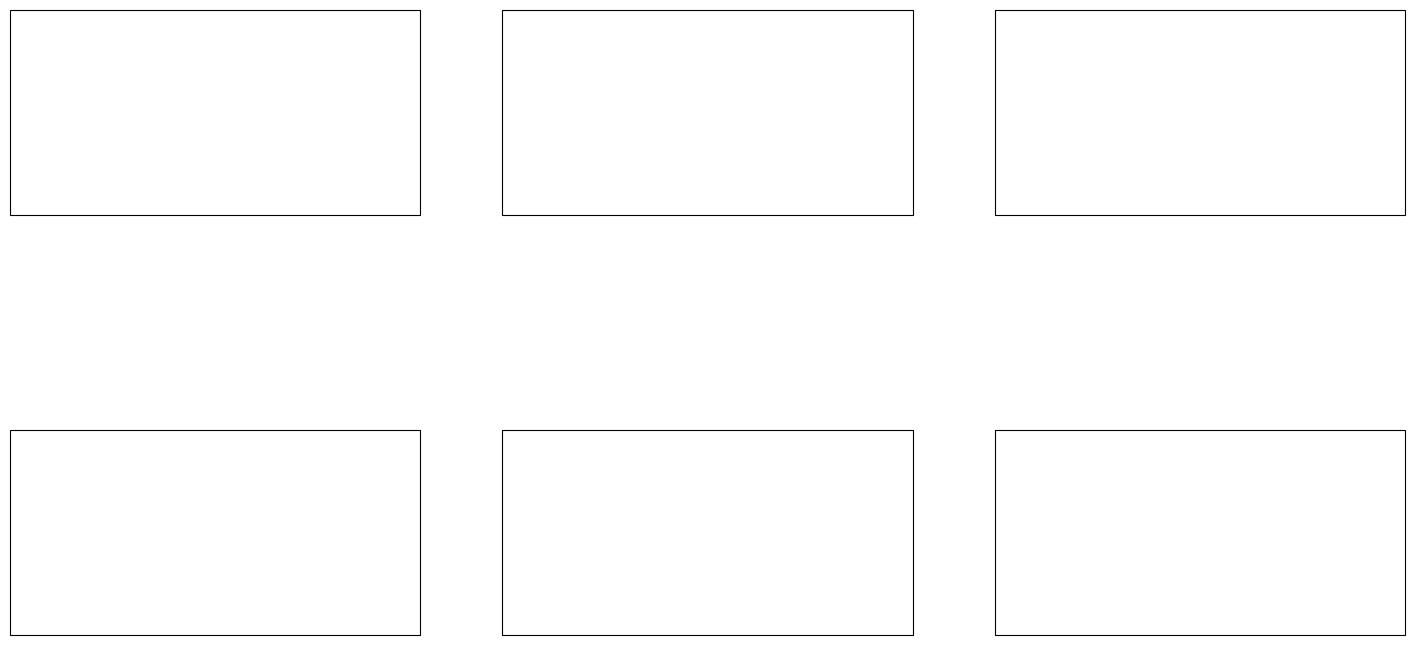

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load data
path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v3/samples_ddpm"
idx = 9140

with np.load(os.path.join(path, f'ldm_{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
    decoded_output_loaded = data['output']  # Adjust shape based on your data
    print('hres_loaded shape:', hres_loaded.shape)
    print('decoded_output_loaded shape:', decoded_output_loaded.shape)

# Select the sample index to visualize
sample_index = 0  # You can change this to visualize different samples

# Extract the sample data
hres_sample = hres_loaded[sample_index]  # Shape: [channels, height, width]

# Check if decoded_output_loaded has multiple ensembles
if len(decoded_output_loaded.shape) == 5:
    # If multiple ensembles, select one (e.g., the first one)
    num_samples = decoded_output_loaded.shape[0]
    decoded_sample = decoded_output_loaded[0, sample_index]  # Shape: [channels, height, width]
else:
    decoded_sample = decoded_output_loaded[sample_index]  # Shape: [channels, height, width]

# Define the channels and limits
channels = ["SSU", "SSV", "SSH"]
channel_lims = [[-2, 2], [-2, 2], [-1, 1]]

# Create longitude and latitude coordinates
# Replace these with your actual coordinates if available
height, width = hres_sample.shape[1], hres_sample.shape[2]
# loncoords = np.linspace(-180, 180, width)
# latcoords = np.linspace(-90, 90, height)

# Set up the plotting projection
projection = ccrs.PlateCarree()

# Create a figure with 2 rows (truth and model output) and 3 columns (channels)
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw={'projection': projection})

# Function to plot data for a given sample and row index
def plot_sample(data_sample, row_index, title_prefix):
    for ivar, (var, lims) in enumerate(zip(channels, channel_lims)):
        im = axs[row_index, ivar].contourf(
            # loncoords, latcoords, data_sample[ivar, 2:-2, 3:-4],
            loncoords, latcoords, data_sample[ivar, :, :],
            levels=np.linspace(lims[0], lims[1], 200),
            vmin=lims[0], vmax=lims[1], transform=projection,
            cmap="coolwarm", extend='both'
        )

        axs[row_index, ivar].coastlines()

        cbar = fig.colorbar(
            im, ax=axs[row_index, ivar], orientation='vertical',
            ticks=[lims[0], 0, lims[1]], fraction=0.046, pad=0.04, shrink=0.5
        )

        gl = axs[row_index, ivar].gridlines(draw_labels=True, alpha=0.3)
        gl.top_labels = False
        gl.right_labels = False

        if ivar != 0:
            gl.left_labels = False

        axs[row_index, ivar].set_title(f"{title_prefix} {var}")

# Plot the ground truth data
plot_sample(hres_sample, row_index=0, title_prefix="Truth")

# Plot the model output data
# plot_sample(decoded_sample, row_index=1, title_prefix="Model Output")

plot_sample(decoded_sample, row_index=1, title_prefix='Prediction')

plt.tight_layout()
plt.show()

Processed batch 1/50
Processed batch 2/50
Processed batch 3/50
Processed batch 4/50
Processed batch 5/50
Processed batch 6/50
Processed batch 7/50
Processed batch 8/50
Processed batch 9/50
Processed batch 10/50
Processed batch 11/50
Processed batch 12/50
Processed batch 13/50
Processed batch 14/50
Processed batch 15/50
Processed batch 16/50
Processed batch 17/50
Processed batch 18/50
Processed batch 19/50
Processed batch 20/50
Processed batch 21/50
Processed batch 22/50
Processed batch 23/50
Processed batch 24/50
Processed batch 25/50
Processed batch 26/50
Processed batch 27/50
Processed batch 28/50
Processed batch 29/50
Processed batch 30/50
Processed batch 31/50
Processed batch 32/50
Processed batch 33/50
Processed batch 34/50
Processed batch 35/50
Processed batch 36/50
Processed batch 37/50
Processed batch 38/50
Processed batch 39/50
Processed batch 40/50
Processed batch 41/50
Processed batch 42/50
Processed batch 43/50
Processed batch 44/50
Processed batch 45/50
Processed batch 46/

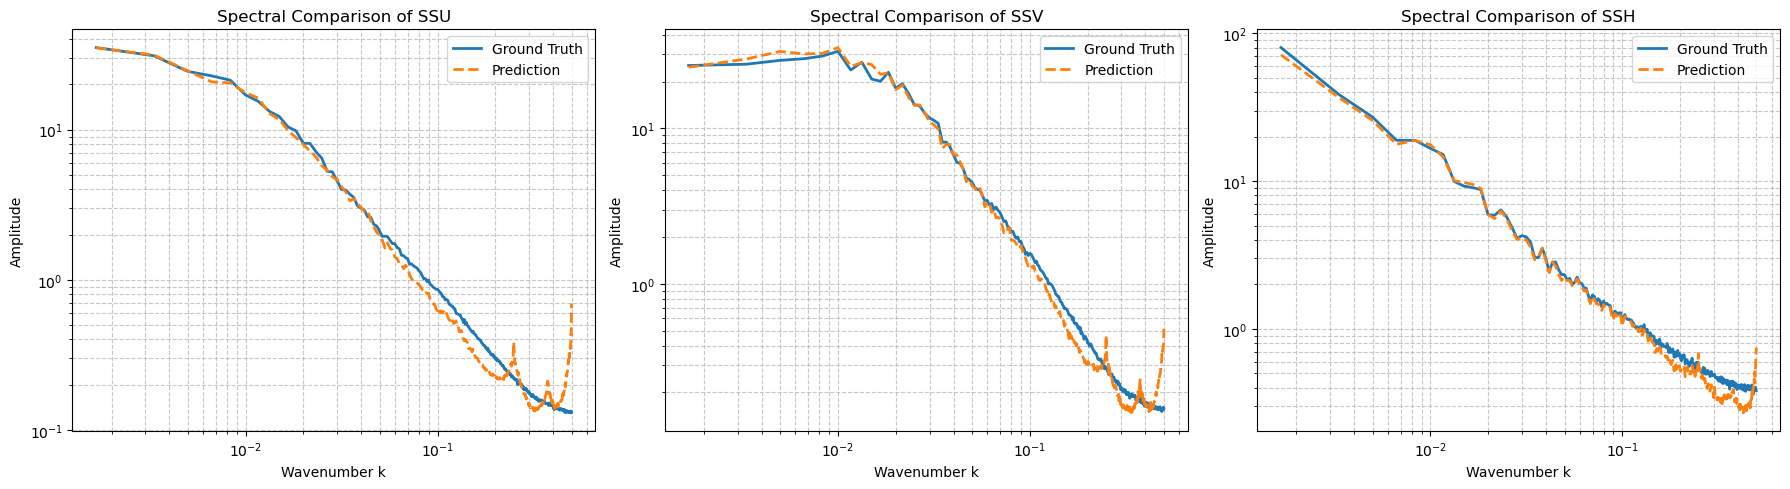

In [25]:
import numpy as np
import os
from scipy import fft
import matplotlib.pyplot as plt

# Initialize accumulators
total_spectrum_pred = None  # Will hold the sum of predicted spectra
total_spectrum_truth = None  # Will hold the sum of ground truth spectra
total_samples = 0  # Total number of samples processed

# Define the spatial resolution (adjust if necessary)
dx = 1  # Spatial resolution along the width; change this if you have a different spatial resolution

# Path to the directory containing the .npz files
path = path = "/media/volume/moein-storage-1/ddpm_ocean/results/spectral_loss_v2/samples"

# Number of batches
num_batches = 50  # Adjust this to the actual number of batches you have

# Loop over all batch indices
for idx in range(num_batches):
    # Load the data for the current batch
    file_path = os.path.join(path, f'ldm_{idx+9131}.npz')
    if not os.path.exists(file_path):
        print(f"File {file_path} does not exist. Skipping.")
        continue  # Skip if the file does not exist

    with np.load(file_path) as data:
        hres_loaded = data['hres']            # Shape: [batch_size, channels, height, width]
        decoded_output_loaded = data['output'][...,2:-2, 3:-4]  # Shape: [batch_size, channels, height, width] or [num_samples, batch_size, channels, height, width]

    # Handle multiple ensembles if necessary
    if decoded_output_loaded.ndim == 5:
        # If multiple ensembles, average over ensembles
        decoded_output_loaded = decoded_output_loaded.mean(axis=0)  # Now shape is [batch_size, channels, height, width]

    # Compute the spectra along the width (axis=3)
    spectrum_pred = np.abs(fft.rfft(decoded_output_loaded, axis=3)).mean(axis=2)  # Average over height
    spectrum_truth = np.abs(fft.rfft(hres_loaded, axis=3)).mean(axis=2)          # Average over height

    # Accumulate the spectra and sample count
    if total_spectrum_pred is None:
        # Initialize the accumulators with the spectra from the first batch
        total_spectrum_pred = spectrum_pred.sum(axis=0)   # Sum over batch dimension
        total_spectrum_truth = spectrum_truth.sum(axis=0) # Sum over batch dimension
    else:
        # Accumulate the sums
        total_spectrum_pred += spectrum_pred.sum(axis=0)
        total_spectrum_truth += spectrum_truth.sum(axis=0)

    # Update the total number of samples processed
    total_samples += hres_loaded.shape[0]

    print(f"Processed batch {idx+1}/{num_batches}")

# Compute the mean spectra over all samples
mean_spectrum_pred = total_spectrum_pred / total_samples  # Shape: [channels, n_freqs]
mean_spectrum_truth = total_spectrum_truth / total_samples  # Shape: [channels, n_freqs]

# Number of points along the width (assuming all batches have the same width)
n = hres_loaded.shape[3]

# Compute the wavenumbers using fft.rfftfreq
freqs = fft.rfftfreq(n, d=dx)

# Exclude the zero frequency (if desired)
ks = freqs[1:]
mean_spectrum_pred = mean_spectrum_pred[:, 1:]
mean_spectrum_truth = mean_spectrum_truth[:, 1:]

# Define channel names
channels = ["SSU", "SSV", "SSH"]

# Plot the spectra
plt.figure(figsize=(18, 5))

for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1)
    plt.loglog(ks, mean_spectrum_truth[i], label='Ground Truth', linewidth=2)
    plt.loglog(ks, mean_spectrum_pred[i], label='Prediction', linestyle='--', linewidth=2)
    plt.xlabel('Wavenumber k')
    plt.ylabel('Amplitude')
    plt.title(f'Spectral Comparison of {channel}')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.7)

plt.tight_layout()
plt.show()

Convergence History Plot

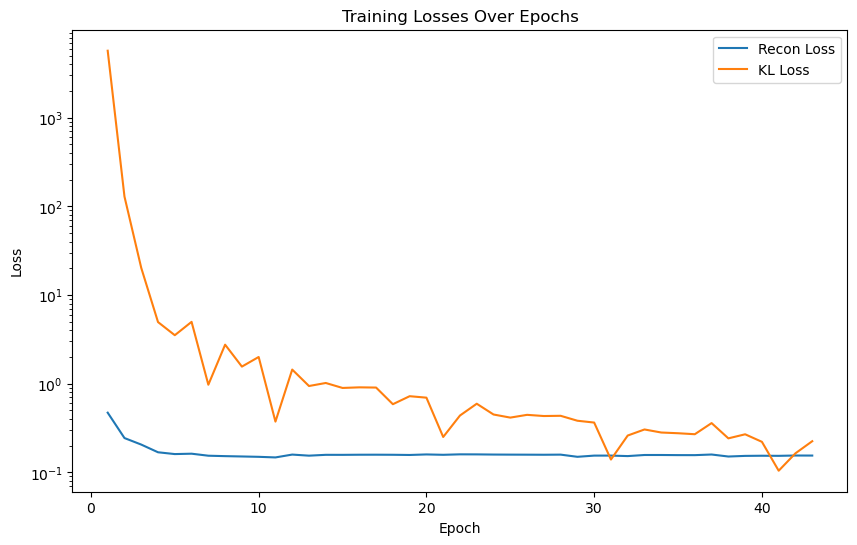

In [9]:
import re
import matplotlib.pyplot as plt

# Path to the log file
task_name="vae_concat_v0"
log_file = f'/glade/derecho/scratch/mdarman/lucie/results/{task_name}/training.log'

# Initialize lists to store losses and epochs
epochs = []
recon_loss = []
kl_loss = []
gen_loss = []
disc_loss = []

# Regex pattern to extract epoch and losses from each line
pattern = r"Epoch (\d+) \| Recon Loss: ([\d.]+) \| KL Loss: ([\d.]+)"

# Open and parse the log file
with open(log_file, 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            # Extract data from each matched line
            epochs.append(int(match.group(1)))
            recon_loss.append(float(match.group(2)))
            kl_loss.append(float(match.group(3)))

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, recon_loss, label='Recon Loss')
plt.plot(epochs, kl_loss, label='KL Loss')
plt.yscale('log')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()

Spectrum

Stacked hres shape: (62, 2, 721, 1440)
Stacked decoded_outputs shape: (62, 2, 721, 1440)
Stacked lres_interp shape: (62, 6, 721, 1440)


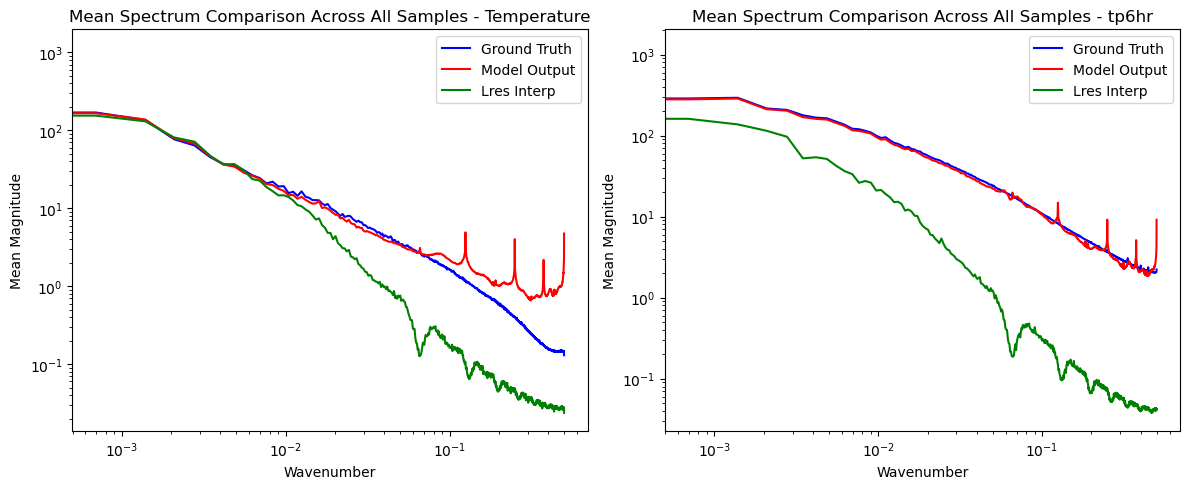

In [24]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt

# Directory containing the sample files
path = "/glade/derecho/scratch/mdarman/lucie/results/vae_concat_lsm/samples"

# Initialize lists to hold all loaded samples for both ground truth and model output
all_hres_samples = []
all_decoded_samples = []
all_lres_interp = []


# Loop over the files and load the data, assuming each file has 8 samples
for idx in range(1, 32):
    with np.load(os.path.join(path, f'{idx}.npz')) as data:
        hres_loaded = data['hres']  # Shape: [8, 2, 721, 1440]
        decoded_output_loaded = data['output']  # Shape: [8, 2, 720, 1440]
        lres_loaded_interp = data['lres_interp']

        # Append each loaded batch to the respective lists
        all_hres_samples.append(hres_loaded)
        all_decoded_samples.append(decoded_output_loaded)
        all_lres_interp.append(lres_loaded_interp)

# Stack all samples along the first dimension to get shape (100, 2, 721, 1440) for hres
# and (100, 2, 720, 1440) for decoded_outputs
all_hres_stacked = np.concatenate(all_hres_samples, axis=0)  # Shape: (100, 2, 721, 1440)
all_decoded_stacked = np.concatenate(all_decoded_samples, axis=0)  # Shape: (100, 2, 720, 1440)
all_lres_interp_stacked = np.concatenate(all_lres_interp, axis=0)
print("Stacked hres shape:", all_hres_stacked.shape)
print("Stacked decoded_outputs shape:", all_decoded_stacked.shape)
print("Stacked lres_interp shape:", all_lres_interp_stacked.shape)

# Define function to compute the mean spectrum using torch.fft.rfft along longitude
def compute_mean_spectrum_torch(data):
    # Convert numpy data to torch tensor
    data_torch = torch.tensor(data, dtype=torch.float32)

    # Perform rFFT along the longitude (last axis, -1)
    spectrum = torch.fft.rfft(data_torch, dim=-1)
    
    # Compute magnitude of the spectrum
    magnitude_spectrum = torch.abs(spectrum)
    
    # Average the spectrum along the longitude dimension and across all samples
    mean_spectrum = magnitude_spectrum.mean(dim=(-2, 0)).numpy()  # Average over latitude and samples, convert to numpy
    return mean_spectrum

# Compute wavenumbers for plotting
longitude_points = all_hres_stacked.shape[3]  # Assumes hres has shape (100, 2, 721, 1440)
wavenumbers = np.fft.rfftfreq(longitude_points, d=1.0)  # Assuming a uniform grid

# Compute the mean spectrum for each channel across all samples for hres and decoded_outputs
spectra_all_hres = [compute_mean_spectrum_torch(all_hres_stacked[:, i, :, :]) for i in range(2)]
spectra_all_decoded = [compute_mean_spectrum_torch(all_decoded_stacked[:, i, :, :]) for i in range(2)]
spectra_all_lres_interp = [compute_mean_spectrum_torch(all_lres_interp_stacked[:, i, :, :]) for i in range(2)]

# Plotting the mean spectra for each channel, comparing ground truth and model output
channels = ["Temperature", "tp6hr"]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, channel in enumerate(channels):
    axs[i].loglog(wavenumbers, spectra_all_hres[i], label="Ground Truth", color="blue")
    axs[i].loglog(wavenumbers, spectra_all_decoded[i], label="Model Output", color="red")
    axs[i].loglog(wavenumbers, spectra_all_lres_interp[i], label="Lres Interp", color="green")
    axs[i].set_title(f"Mean Spectrum Comparison Across All Samples - {channel}")
    axs[i].set_xlabel("Wavenumber")
    axs[i].set_ylabel("Mean Magnitude")
    axs[i].legend()

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the path and load the data
task_name = "vae_concat_v0"
path = f"/glade/derecho/scratch/mdarman/lucie/results/{task_name}/samples"
idx = 5

# Load data
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    lres = data['lres']            
    lres_interp = data['lres_interp']
    hres = data['hres']            # Shape: [8, 2, 721, 1440]
    output = data['output']  # Shape: [8, 2, 720, 1440]

# Define channels and coordinates
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']
loncoords = np.linspace(-180, 180, hres_loaded.shape[3])
latcoords_hres = np.linspace(-90, 90, hres_loaded.shape[2])
latcoords_decoded = np.linspace(-90, 90, decoded_output_loaded.shape[2])

# Load denormalization statistics
lr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_lr.npz", allow_pickle=True)
hr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_hr.npz", allow_pickle=True)

for 

# Denormalize function
def denormalize(data, lims):
    return data * lims[1] + lims[0]

# Iterate over samples and plot each one
for sample_index in range(hres_loaded.shape[0]):
    hres_sample = hres_loaded[sample_index]
    decoded_sample = decoded_output_loaded[sample_index]

    # Denormalize the high-res and decoded samples
    hres_sample_denorm = np.empty_like(hres_sample)
    decoded_sample_denorm = np.empty_like(decoded_sample)
    for i, lims in enumerate(channel_lims):
        hres_sample_denorm[i] = denormalize(hres_sample[i], lims)
        decoded_sample_denorm[i] = denormalize(decoded_sample[i], lims)

    # Transform tp6hr channel (if needed)
    hres_sample_denorm[1] = np.exp(hres_sample_denorm[1]) - 1e-6
    decoded_sample_denorm[1] = np.exp(decoded_sample_denorm[1]) - 1e-6

    # Set up the plotting
    fig, axs = plt.subplots(3, 2, figsize=(18, 15), subplot_kw={'projection': ccrs.PlateCarree()})

    # Function to handle plotting for each type of data
    def plot_sample(data_sample, latcoords, row_index, title_prefix):
        for ivar, (var, lims) in enumerate(zip(channels, channel_lims)):
            vmin, vmax = lims[0], lims[0] + 3 * lims[1]
            if ivar == 1:
                vmin, vmax = 0, 1
            im = axs[row_index, ivar].contourf(
                loncoords, latcoords, data_sample[ivar, :, :],
                levels=np.linspace(vmin, vmax, 200),
                vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(),
                cmap="coolwarm", extend='both'
            )
            axs[row_index, ivar].coastlines()
            axs[row_index, ivar].gridlines(draw_labels=True, alpha=0.3).top_labels = False
            axs[row_index, ivar].set_title(f"{title_prefix} {var} (Sample {sample_index})")

    # Plot each data type: Truth, Prediction, and High-Res
    plot_sample(hres_sample_denorm, latcoords_hres, row_index=0, title_prefix="Truth")
    plot_sample(decoded_sample_denorm, latcoords_decoded, row_index=1, title_prefix="Prediction")
    plot_sample(hres_sample, latcoords_hres, row_index=2, title_prefix="High-Res")

    plt.tight_layout()
    plt.show()

KeyError: 'decoded_outputs is not a file in the archive'

In [23]:
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    hres_loaded = data['hres']            # Shape: [8, 2, 721, 1440]
    decoded_output_loaded = data['decoded_outputs']  # Shape: [8, 2, 720, 1440]

In [7]:
import numpy as np
import os

with np.load(os.path.join(path, f'{idx}.npz')) as data:
    lres = data['lres']            
    lres_interp = data['lres_interp']
    hres = data['hres']            # Shape: [8, 2, 721, 1440]
    output = data['output']  # Shape: [8, 2, 720, 1440]
    print('lres shape:', lres.shape)
    print('lres_interp shape:', lres_interp.shape)
    print('hres shape:', hres.shape)
    print('output shape:', output.shape)
    


lres shape: (2, 6, 48, 96)
lres_interp shape: (2, 6, 721, 1440)
hres shape: (2, 2, 721, 1440)
output shape: (2, 2, 721, 1440)


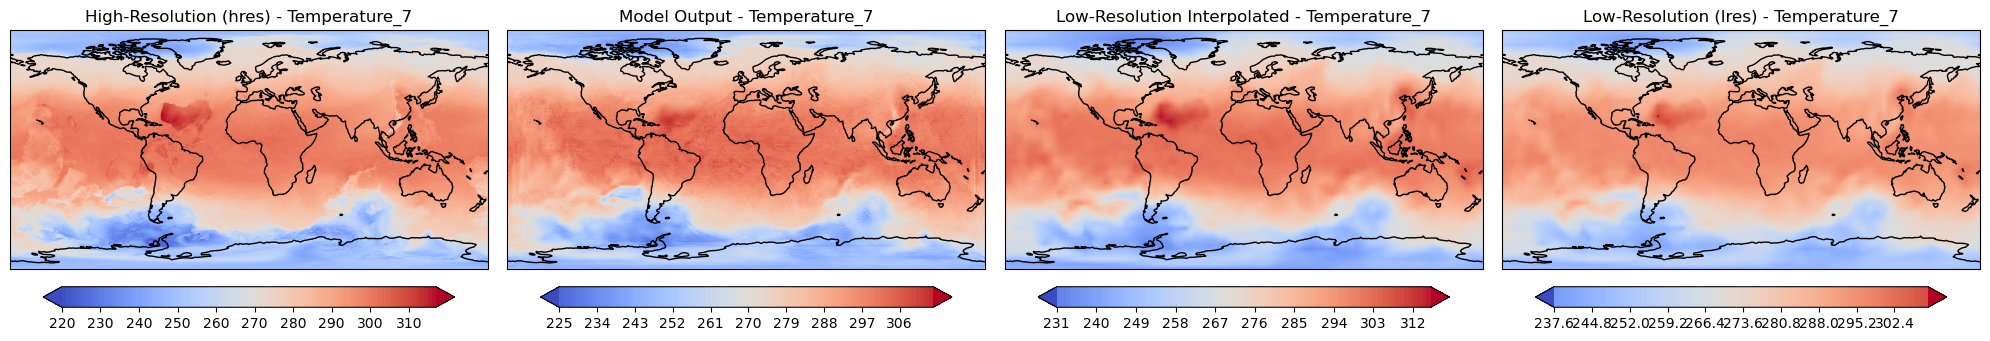

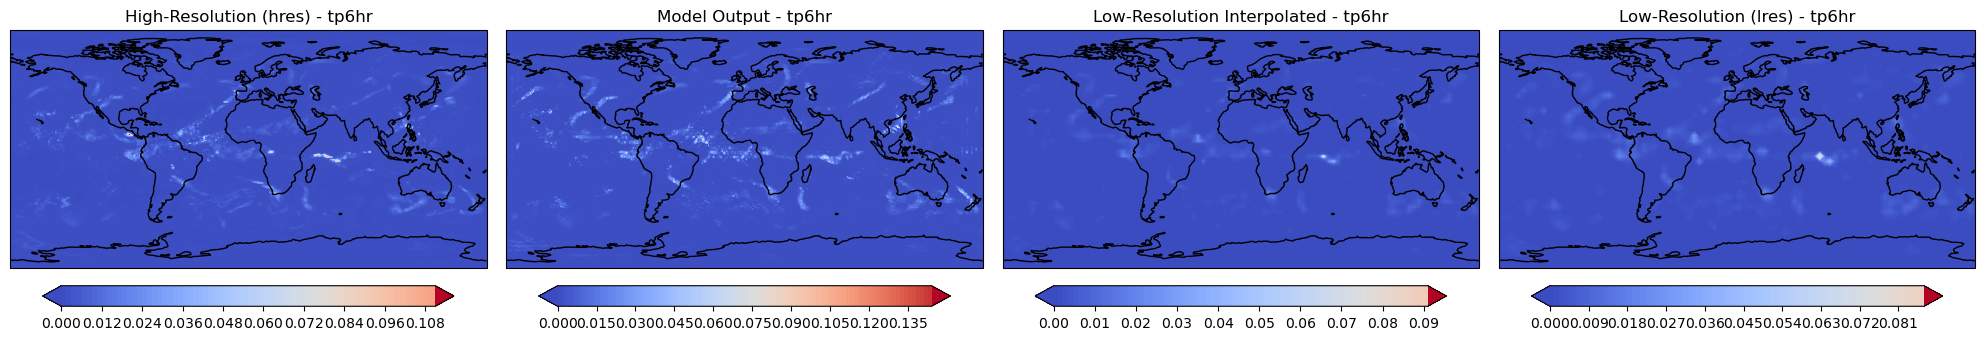

In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the path and load the data
task_name = "vae_concat_lsm"
path = f"/glade/derecho/scratch/mdarman/lucie/results/{task_name}/samples"
idx = 5

# Load data
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    lres = data['lres']            
    lres_interp = data['lres_interp']
    hres = data['hres']            # Shape: [8, 2, 721, 1440]
    output = data['output']        # Shape: [8, 2, 720, 1440]

# Define channels and coordinates
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']
loncoords_hres = np.linspace(-180, 180, hres.shape[3])     # For high-res and lres_interp data (1440 points)
latcoords_hres = np.linspace(-90, 90, hres.shape[2])       # For high-res and lres_interp data (721 points)
loncoords_lres = np.linspace(-180, 180, lres.shape[3])     # For low-res data (96 points)
latcoords_lres = np.linspace(-90, 90, lres.shape[2])       # For low-res data (48 points)

# Load denormalization statistics
lr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_lr.npz", allow_pickle=True)
hr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_hr.npz", allow_pickle=True)

# Extract mean and std for each channel
temperature_mean_hr = hr_stats['2m_temperature'].item()['mean']
temperature_std_hr = hr_stats['2m_temperature'].item()['std']
precip_mean_hr = hr_stats['tp6hr'].item()['mean']
precip_std_hr = hr_stats['tp6hr'].item()['std']

temperature_mean_lr = lr_stats['Temperature_7'].item()['mean']
temperature_std_lr = lr_stats['Temperature_7'].item()['std']
precip_mean_lr = lr_stats['tp6hr'].item()['mean']
precip_std_lr = lr_stats['tp6hr'].item()['std']

# Denormalize each dataset by channel
hres_denorm = np.empty_like(hres)
output_denorm = np.empty_like(output)
lres_denorm = np.empty_like(lres)
lres_interp_denorm = np.empty_like(lres_interp)

# Denormalize high-resolution data and output data
hres_denorm[:, 0, :, :] = hres[:, 0, :, :] * temperature_std_hr + temperature_mean_hr  # Temperature_7
hres_denorm[:, 1, :, :] = np.exp(hres[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6  # tp6hr (precipitation)
output_denorm[:, 0, :, :] = output[:, 0, :, :] * temperature_std_hr + temperature_mean_hr
output_denorm[:, 1, :, :] = np.exp(output[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6

# Denormalize low-resolution data and interpolated data
lres_denorm[:, 0, :, :] = lres[:, 0, :, :] * temperature_std_lr + temperature_mean_lr  # Temperature_7
lres_denorm[:, 1, :, :] = np.exp(lres[:, -1, :, :] * precip_std_lr + precip_mean_lr) - 1e-6
lres_interp_denorm[:, 0, :, :] = lres_interp[:, 0, :, :] * temperature_std_hr + temperature_mean_hr
lres_interp_denorm[:, 1, :, :] = np.exp(lres_interp[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6

# Define channel-specific vmin and vmax
vmin_temp = hres_denorm[:, 0, :, :].min()
vmax_temp = hres_denorm[:, 0, :, :].max()
vmin_precip = hres_denorm[:, 1, :, :].min()
vmax_precip = hres_denorm[:, 1, :, :].max()

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Plot each channel: Temperature_7 and tp6hr (precipitation)
for var_idx, (var_name, vmin, vmax) in enumerate([('Temperature_7', vmin_temp, vmax_temp), ('tp6hr', vmin_precip, vmax_precip)]):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={'projection': projection})
    data_to_plot = [
        (hres_denorm[:, var_idx, :, :], "High-Resolution (hres)", loncoords_hres, latcoords_hres),
        (output_denorm[:, var_idx, :, :], "Model Output", loncoords_hres, latcoords_hres),
        (lres_interp_denorm[:, var_idx, :, :], "Low-Resolution Interpolated", loncoords_hres, latcoords_hres),
        (lres_denorm[:, var_idx, :, :], "Low-Resolution (lres)", loncoords_lres, latcoords_lres)
    ]

    # Plot each dataset
    for ax, (data, title, loncoords, latcoords) in zip(axs, data_to_plot):
        im = ax.contourf(
            loncoords, latcoords, data[0, :, :], levels=100, vmin=vmin, vmax=vmax,
            transform=projection, cmap="coolwarm", extend="both"
        )
        ax.coastlines()
        ax.set_title(f"{title} - {var_name}")
        fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

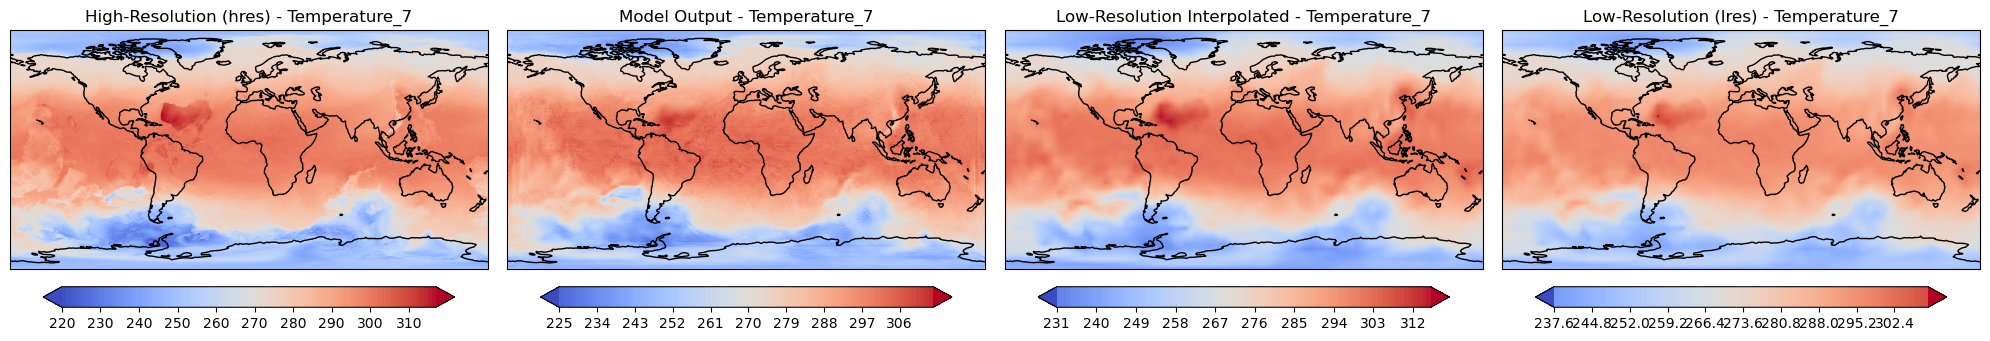

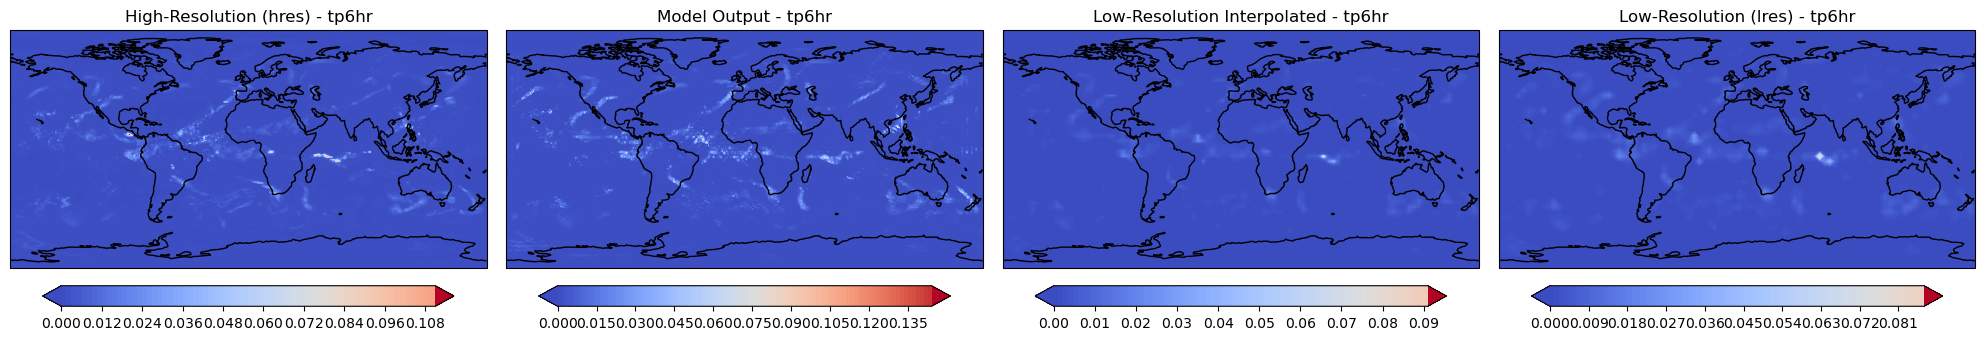

In [23]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the path and load the data
task_name = "vae_concat_lsm"
path = f"/glade/derecho/scratch/mdarman/lucie/results/{task_name}/samples"
idx = 5

# Load data
with np.load(os.path.join(path, f'{idx}.npz')) as data:
    lres = data['lres']            
    lres_interp = data['lres_interp']
    hres = data['hres']            # Shape: [8, 2, 721, 1440]
    output = data['output']        # Shape: [8, 2, 720, 1440]

# Define channels and coordinates
input_vars = ['Temperature_7', 'Specific_Humidity_7', 'U-wind_3', 'V-wind_3', 'logp', 'tp6hr']
output_vars = ['2m_temperature', 'tp6hr']
loncoords_hres = np.linspace(-180, 180, hres.shape[3])     # For high-res and lres_interp data (1440 points)
latcoords_hres = np.linspace(-90, 90, hres.shape[2])       # For high-res and lres_interp data (721 points)
loncoords_lres = np.linspace(-180, 180, lres.shape[3])     # For low-res data (96 points)
latcoords_lres = np.linspace(-90, 90, lres.shape[2])       # For low-res data (48 points)

# Load denormalization statistics
lr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_lr.npz", allow_pickle=True)
hr_stats = np.load("/glade/derecho/scratch/mdarman/lucie/stats_2000_2003_hr.npz", allow_pickle=True)

# Extract mean and std for each channel
temperature_mean_hr = hr_stats['2m_temperature'].item()['mean']
temperature_std_hr = hr_stats['2m_temperature'].item()['std']
precip_mean_hr = hr_stats['tp6hr'].item()['mean']
precip_std_hr = hr_stats['tp6hr'].item()['std']

temperature_mean_lr = lr_stats['Temperature_7'].item()['mean']
temperature_std_lr = lr_stats['Temperature_7'].item()['std']
precip_mean_lr = lr_stats['tp6hr'].item()['mean']
precip_std_lr = lr_stats['tp6hr'].item()['std']

# Denormalize each dataset by channel
hres_denorm = np.empty_like(hres)
output_denorm = np.empty_like(output)
lres_denorm = np.empty_like(lres)
lres_interp_denorm = np.empty_like(lres_interp)

# Denormalize high-resolution data and output data
hres_denorm[:, 0, :, :] = hres[:, 0, :, :] * temperature_std_hr + temperature_mean_hr  # Temperature_7
hres_denorm[:, 1, :, :] = np.exp(hres[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6  # tp6hr (precipitation)
output_denorm[:, 0, :, :] = output[:, 0, :, :] * temperature_std_hr + temperature_mean_hr
output_denorm[:, 1, :, :] = np.exp(output[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6

# Denormalize low-resolution data and interpolated data
lres_denorm[:, 0, :, :] = lres[:, 0, :, :] * temperature_std_lr + temperature_mean_lr  # Temperature_7
lres_denorm[:, 1, :, :] = np.exp(lres[:, -1, :, :] * precip_std_lr + precip_mean_lr) - 1e-6
lres_interp_denorm[:, 0, :, :] = lres_interp[:, 0, :, :] * temperature_std_hr + temperature_mean_hr
lres_interp_denorm[:, 1, :, :] = np.exp(lres_interp[:, -1, :, :] * precip_std_hr + precip_mean_hr) - 1e-6

# Define channel-specific vmin and vmax for consistent scaling within each figure
vmin_temp = hres_denorm[:, 0, :, :].min()
vmax_temp = hres_denorm[:, 0, :, :].max()
vmin_precip = hres_denorm[:, 1, :, :].min()
vmax_precip = hres_denorm[:, 1, :, :].max()

# Set up the plotting parameters
projection = ccrs.PlateCarree()

# Plot each channel: Temperature_7 and tp6hr (precipitation)
for var_idx, (var_name, vmin, vmax) in enumerate([('Temperature_7', vmin_temp, vmax_temp), ('tp6hr', vmin_precip, vmax_precip)]):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={'projection': projection})
    data_to_plot = [
        (hres_denorm[:, var_idx, :, :], "High-Resolution (hres)", loncoords_hres, latcoords_hres),
        (output_denorm[:, var_idx, :, :], "Model Output", loncoords_hres, latcoords_hres),
        (lres_interp_denorm[:, var_idx, :, :], "Low-Resolution Interpolated", loncoords_hres, latcoords_hres),
        (lres_denorm[:, var_idx, :, :], "Low-Resolution (lres)", loncoords_lres, latcoords_lres)
    ]

    # Plot each dataset using the same vmin and vmax for this figure
    for ax, (data, title, loncoords, latcoords) in zip(axs, data_to_plot):
        im = ax.contourf(
            loncoords, latcoords, data[0, :, :], levels=100, vmin=vmin, vmax=vmax,
            transform=projection, cmap="coolwarm", extend="both"
        )
        ax.coastlines()
        ax.set_title(f"{title} - {var_name}")
        fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()